In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import  load_iris

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['online_shoppers_intention.csv']))



```
# This is formatted as code
```

# Data Cleaning 

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
numeric_attr=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for n in numeric_attr:
    Q1 = df[n].quantile(0.25)
    Q3 = df[n].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[n] >= Q1 - 1.5 * IQR) & (df[n] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

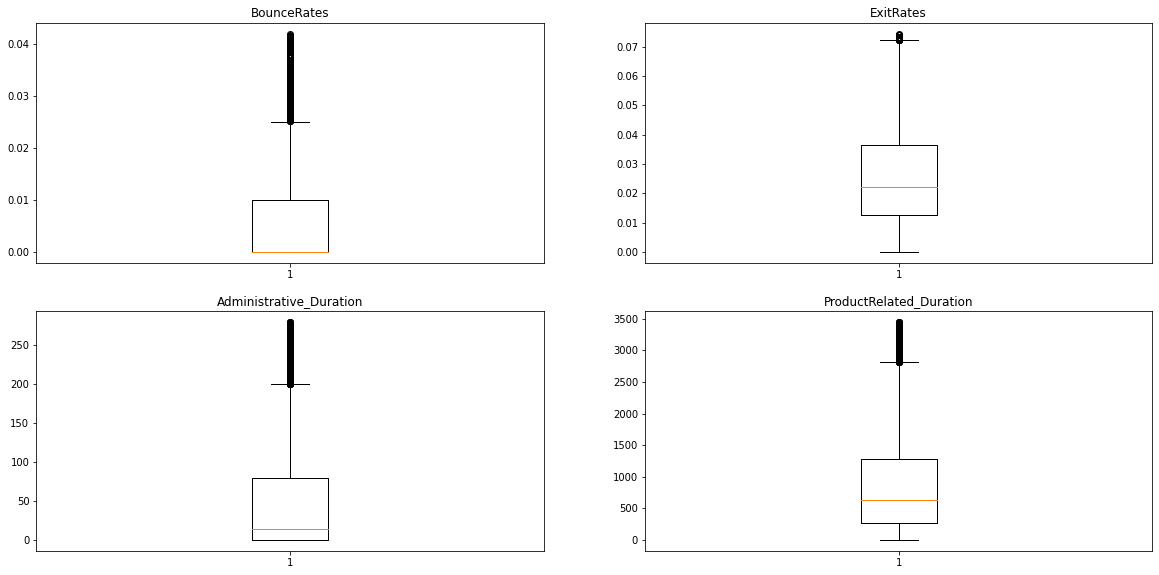

In [ ]:
plt.figure(figsize = (20, 15))
for i, value in enumerate(numeric_attr):
  i=i+1
  ax=plt.subplot(3,2,i)
  plt.boxplot(df[value])
  ax.set_title(value)

In [ ]:
def data_cleaning(df):
  df.Month[df.Month == 'Feb'] = 2
  df.Month[df.Month == 'Mar'] = 3
  df.Month[df.Month == 'May'] = 5
  df.Month[df.Month == 'June'] = 6
  df.Month[df.Month == 'Jul'] = 7
  df.Month[df.Month == 'Aug'] = 8
  df.Month[df.Month == 'Sep'] = 9
  df.Month[df.Month == 'Oct'] = 10
  df.Month[df.Month == 'Nov'] = 11
  df.Month[df.Month == 'Dec'] = 12

  df.Month = df.Month.astype(int)
  
  df.VisitorType[df.VisitorType == 'Returning_Visitor'] = 1
  df.VisitorType[df.VisitorType == 'New_Visitor'] = 2
  df.VisitorType[df.VisitorType == 'Other'] = 0
  
  df.VisitorType = df.VisitorType.astype(int)


  df.Weekend[df.Weekend == 'True'] = 1
  df.Weekend[df.Weekend == 'False'] = 0
  df.Weekend = df.Weekend.astype(int)

  df.Revenue[df.Revenue == 'True'] = 1
  df.Revenue[df.Revenue == 'False'] = 0
  df.Revenue = df.Revenue.astype(int)

  return df

In [ ]:
df = data_cleaning(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

# Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

In [ ]:
y=df.Revenue

In [ ]:
X.shape


(8758, 17)

In [ ]:
y.shape

(8758,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [ ]:
y_test.shape

(1752,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(random_state=100, n_estimators=100)

In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
imp = classifier.feature_importances_

In [ ]:
feat_imp = pd.DataFrame({"Columns": X_train.columns, "Importance":imp})


In [ ]:
feat_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Columns     17 non-null     object 
 1   Importance  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


In [ ]:
feat_imp.sort_values(by='Importance',ascending=False)

,Columns,Importance
8,PageValues,0.426251
5,ProductRelated_Duration,0.086179
7,ExitRates,0.078953
4,ProductRelated,0.066746
1,Administrative_Duration,0.054746
6,BounceRates,0.048681
10,Month,0.038554
0,Administrative,0.038019
14,TrafficType,0.031584
13,Region,0.030125


Text(0.5, 1.0, 'Data Columns vs its importances')

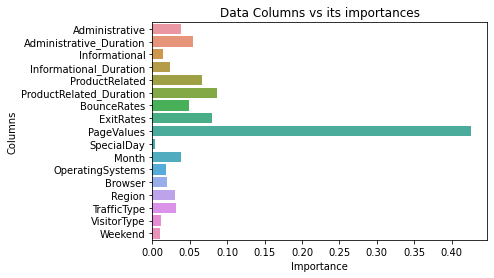

In [ ]:
sns.barplot(x='Importance', y='Columns', data=feat_imp)
plt.title('Data Columns vs its importances')